# https://www.kaggle.com/c/digit-recognizer/
# with keras + CNN, scored 0.9785714285714285

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [66]:
# load csv files to numpy arrays

def load_data():
    train = pd.read_csv("train.csv")
    X_train = train.values[:,1:] 
    y_train = train.values[:,0]
    
    Pred_test = pd.read_csv("test.csv").values
    return X_train, y_train, Pred_test

def flush_predictons(predictions, output_name='out.csv'):
    '''
    predictions is a np.array of int 
    '''
    imgs = pd.Series(range(1,pred_test.shape[0]+1))
    imgd = pd.DataFrame(imgs)
    
    labeld = pd.DataFrame(predictions)
    out = pd.concat([imgd, labeld],axis=1)
    out.columns = ["ImageId", "Label"]
    out.to_csv(output_name, index = False)
    
x_train, y_train, pred_test = load_data()

In [67]:
print(x_train.shape, y_train.shape, pred_test.shape)

(42000, 784) (42000,) (28000, 784)


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

/Users/vincent/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(33600, 784) (33600,) (8400, 784) (8400,)


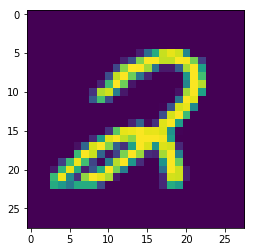

In [69]:
plt.imshow(x_train[4].reshape(28, 28))

In [70]:
from keras import models, layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten, ZeroPadding2D, BatchNormalization
from keras.optimizers import RMSprop

In [71]:
# data preprocessing for keras CNN
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')/255
x_test  = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')/255

In [72]:
batch_size = 128
num_classes = 10
epochs = 20
pool_size=(2,2)

In [73]:
# one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [74]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(33600, 28, 28, 1) (33600, 10) (8400, 28, 28, 1) (8400, 10)


In [75]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1,)))
model.add(Activation('relu'))
model.add(BatchNormalization(epsilon=1e-6, axis=1))
model.add(MaxPool2D(pool_size=pool_size))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(48, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization(epsilon=1e-6, axis=1))
model.add(MaxPool2D(pool_size=pool_size))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization(epsilon=1e-6, axis=1))
model.add(MaxPool2D(pool_size=pool_size))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(80, kernel_size=(2,2)))
model.add(Activation('relu'))
model.add(BatchNormalization(epsilon=1e-6, axis=1))
model.add(MaxPool2D(pool_size=pool_size))


model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(2560))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_36 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 32)        104       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
zero_padding2d_18 (ZeroPaddi (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 48)        13872     
_________________________________________________________________
activation_37 (Activation)   (None, 13, 13, 48)        0         
__________

In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 1152/33600 [>.............................] - ETA: 3:45 - loss: 5.0334 - acc: 0.2266

KeyboardInterrupt: 

In [55]:
pred_test = pred_test.reshape(pred_test.shape[0], 784).astype('float32')/255
pred = model.predict_classes(pred_test)